In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [228]:
salary_data = pd.read_csv("salary_data.csv")
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [229]:
x = salary_data.iloc[:, :-1].values
y = salary_data.iloc[:, 1].values

# Visualize the training data set

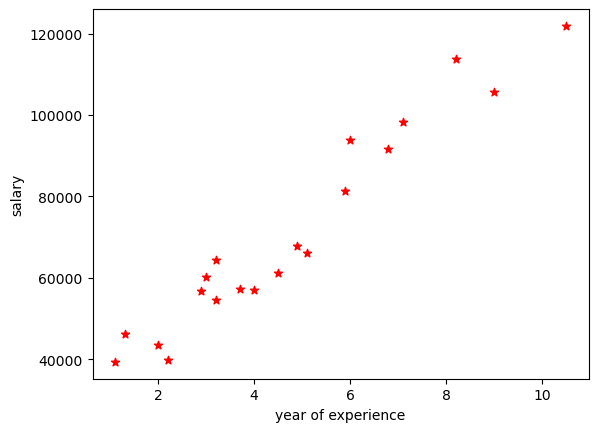

In [230]:
plt.xlabel('year of experience')
plt.ylabel('salary')
plt.scatter(x_train, y_train, color='red', marker='*')

# Splitting the data into training and testing data sets

In [231]:
from sklearn.model_selection import train_test_split

In [232]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=1/3, random_state=0)

# FItting simple linear regression to training set

In [233]:
from sklearn import linear_model
# Train the model
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [234]:
# Predicting the values
# predict funtion expect 2d array
y_predicted = reg.predict(x_test)
y_predicted

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

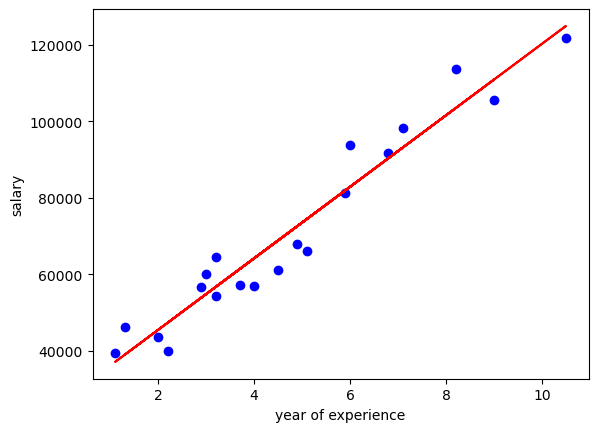

In [235]:
plt.xlabel('year of experience')
plt.ylabel('salary')
plt.scatter(x_train, y_train, color='blue')
plt.plot(x_train, reg.predict(x_train), color='red')

# Visualizing the test set result

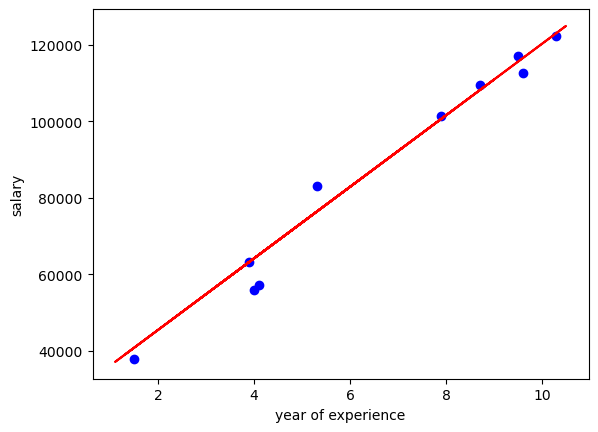

In [236]:
plt.xlabel('year of experience')
plt.ylabel('salary')
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_train, reg.predict(x_train), color='red')

# Finding the Residuals

In [237]:
# calculating residuas
from sklearn import metrics

In [238]:
print("MSE:", metrics.mean_squared_error(y_test, y_predicted))
print("MAE:", metrics.mean_absolute_error(y_test, y_predicted))
print("MSE:", np.sqrt(metrics.mean_absolute_error(y_test, y_predicted)))

MSE: 21026037.329511303
MAE: 3426.42693743071
MSE: 58.535689433291125


# Another way

In [239]:
from sklearn import linear_model

In [240]:
area = [2600, 3000, 3200, 3600, 4000]
price = [550000, 565000, 610000, 680000, 725000]

In [241]:
df = pd.DataFrame({
    'area': area,
    'price': price
})

df.to_csv('area-price.csv', index=False)

In [242]:
df = pd.read_csv('area-price.csv')

In [243]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


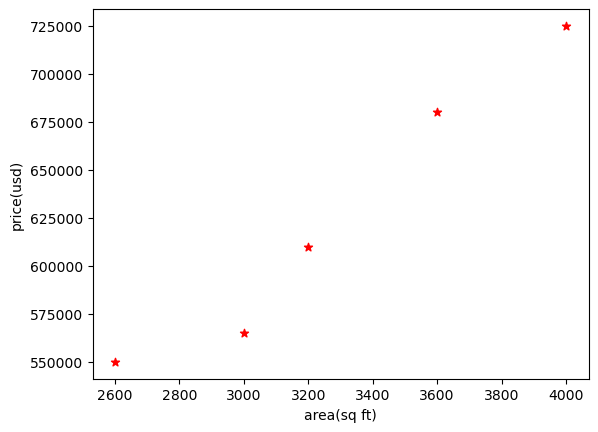

In [244]:
plt.xlabel('area(sq ft)')
plt.ylabel('price(usd)')
plt.scatter(df.area, df.price, color='red', marker='*')

In [245]:
# Train the model
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)

LinearRegression()

In [246]:
# Predicting the values
# predict funtion expect 2d array
reg.predict([[2600]])

F:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([533664.38356164])

In [251]:
reg.predict(df[['area']])

array([533664.38356164, 587979.45205479, 615136.98630137, 669452.05479452,
       723767.12328767])

In [252]:
# coefficient(m)
reg.coef_

array([135.78767123])

In [253]:
# intercept(m)
reg.intercept_

180616.43835616432

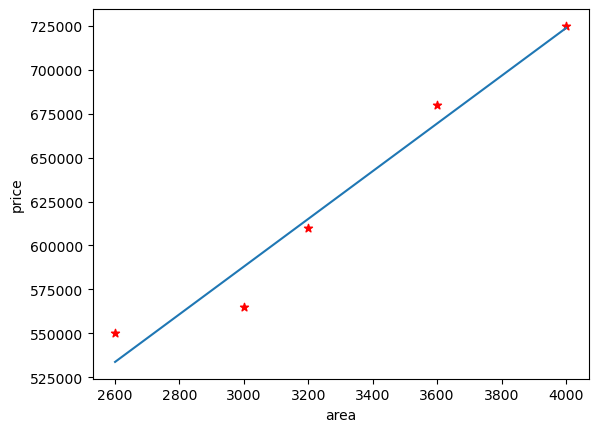

In [254]:
# Regression line
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area, df.price, color='red', marker='*')
plt.plot(df.area, reg.predict(df[['area']]))